Average number of sentences total, classwise, sourcewise

Average number of words total, sourcewise, classwise 


Word cloud for each source

Plots of different embeddings using pca/tane/uma in 2D for classes 0 and 1 (sourcewise)

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('all_in_one_NEW_CLEANED_FINAL.csv')

In [ ]:
data

,terms,definitions,source,assigned_readibility,flesch_reading_ease,flesch_kincaid_grade,smog_index,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford,gulpease_index,osman
0,adjusted present value (apv),net present value of an asset if financed sole...,prin,0,59.64,9.9,0.0,9.40,10.5,10.16,6,12.000000,12.00,9th and 10th grade,96.4,93.39,43.58,2.9,57.500000,63.21
1,agency costs,"costs that arise when an agent (e.g., a manage...",prin,0,66.07,9.5,0.0,7.78,12.3,10.47,4,15.000000,14.25,9th and 10th grade,100.4,97.05,45.61,2.6,54.454545,66.35
2,annual percentage rate (apr),"the interest rate per period (e.g., per month)...",prin,0,62.68,8.7,0.0,6.67,8.4,10.98,4,12.500000,16.21,8th and 9th grade,99.5,94.55,48.74,2.9,61.352941,75.43
3,annuity,investment that produces a level stream of cas...,prin,0,56.25,9.1,0.0,9.56,8.7,9.64,4,10.500000,14.00,9th and 10th grade,95.6,92.16,44.04,3.1,61.000000,64.66
4,annuity due,annuity whose payments occur at the start of e...,prin,0,61.33,7.2,0.0,8.50,6.2,10.45,4,6.000000,12.00,8th and 9th grade,100.6,97.16,46.11,2.4,71.000000,74.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16163,ZERO COUPON SWAP,An OVER-THE-COUNTER SWAP involvingtheexchange ...,palgrave,0,35.78,12.9,0.0,13.46,13.4,10.10,9,13.250000,12.81,12th and 13th grade,80.0,73.84,37.34,4.5,50.891892,43.46
16164,ZERO COUPON YIELD CURVE,A YIELD CURVE representing DISCOUNTRATES acros...,palgrave,0,52.19,10.7,14.1,15.66,15.5,10.95,17,13.166667,15.32,15th and 16th grade,91.5,87.28,33.41,3.4,46.543860,33.87
16165,ZERO MINUS TICK,Sale of a SECURITY at the same price as the la...,palgrave,0,66.74,7.2,10.5,6.83,6.2,9.14,9,7.166667,9.30,6th and 7th grade,103.6,101.18,48.87,2.3,67.205128,80.33
16166,ZERO PLUS TICK,Sale of a SECURITY at the same price as the la...,palgrave,0,66.74,7.2,10.5,6.54,6.0,8.73,8,7.166667,9.30,6th and 7th grade,103.6,102.78,49.36,2.2,67.717949,81.57


# Average number of sentences total, classwise, sourcewise

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm') # Load the English Model

In [ ]:
def num_sents(txt):
  doc = nlp(txt)
  return len([i for i in doc.sents])

In [ ]:
data['number_of_sentences'] = data['definitions'].apply(lambda x : num_sents(str(x)))

In [ ]:
data['number_of_sentences'].mean()

2.1472662048490845

In [ ]:
data['number_of_sentences'].max()

73

In [ ]:
data['number_of_sentences'].min()

1

In [ ]:
data['number_of_sentences'].median()

2.0

In [ ]:
data[data['number_of_sentences']==73].iloc[0,:]['definitions']

'Dim sum bond\' is a slang term for bonds denominated in Chinese renminbi and issued in Hong Kong. Dim sum bonds are attractive to foreign investors who desire exposure to renminbi-denominated assets, but are restricted by China\'s capital controls from investing in domestic Chinese debt.\tinvestopedia\t1\t40.18\t13.2\t0\t13.41\t15.3\t11.77\t14\t15.75\t15.22\t15th and 16th grade\t81.9\t76.35\t36.45\t4.2\t48.33333333\t40.39\nDirect Cost\tA direct cost is a price that can be directly tied to the production of specific goods or services. A direct cost can be traced to the cost object, which can be a service, product, or department. Direct and indirect costs are the two major types of expenses or costs that companies can incur. Direct costs are often variable costs, meaning they fluctuate with production levels such as inventory. However, some costs, such as indirect costs are more difficult to assign to a specific product. Examples of indirect costs include depreciation and administrative

In [ ]:
data.groupby('source')['number_of_sentences'].mean()

source
6_8_louis              1.451613
9_12_louis             1.388527
college_louis          1.393197
economist              3.792683
fmi                    1.181034
investopedia           2.648056
ncert                  1.302013
ncert_class12_econ     1.144737
ncert_keec111          1.009804
ncert_kest             1.250000
non_educators_louis    1.389110
opod                   1.147170
palgrave               2.113160
pre_louis              1.247191
prin                   1.192090
sam                    2.603448
zvi                    1.236190
Name: number_of_sentences, dtype: float64

In [ ]:
data.groupby('assigned_readibility')['number_of_sentences'].mean()

assigned_readibility
0    1.743245
1    2.467036
Name: number_of_sentences, dtype: float64

# Average number of tokens total, sourcewise, classwise

In [ ]:
def num_tokens(txt):
  doc = nlp(txt)
  return len([i for i in doc])

In [ ]:
data['number_of_tokens'] = data['definitions'].apply(lambda x : num_tokens(str(x)))

In [ ]:
data['number_of_tokens'].mean()

45.198849579416134

In [ ]:
data.groupby('source')['number_of_tokens'].mean()

source
6_8_louis              27.106855
9_12_louis             25.585398
college_louis          25.760544
economist              81.853659
fmi                    20.047414
investopedia           64.745522
ncert                  20.208054
ncert_class12_econ     19.671053
ncert_keec111           3.764706
ncert_kest             17.053571
non_educators_louis    25.682603
opod                   16.841509
palgrave               37.710028
pre_louis              18.533708
prin                   14.338983
sam                    43.178161
zvi                    19.579048
Name: number_of_tokens, dtype: float64

In [ ]:
data.groupby('assigned_readibility')['number_of_tokens'].mean()

assigned_readibility
0    30.605068
1    56.749363
Name: number_of_tokens, dtype: float64

# Word cloud for each source

In [ ]:
!pip install wordcloud

In [ ]:
import collections
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [ ]:
other_stopwords_to_remove = ['\t']
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

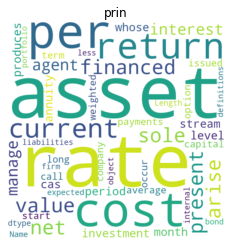

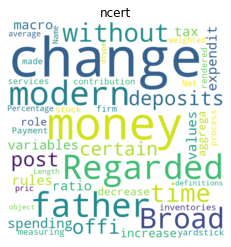

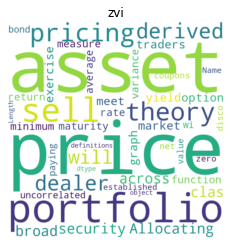

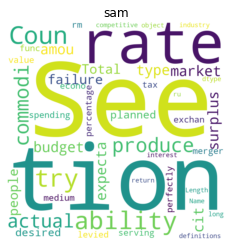

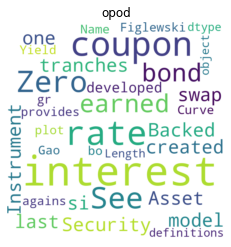

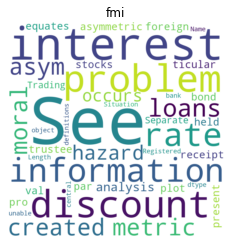

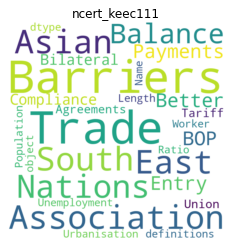

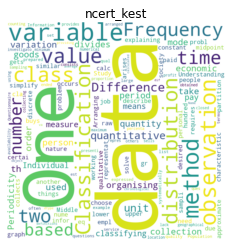

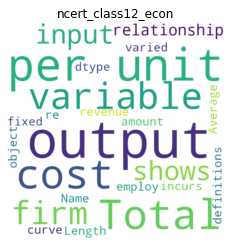

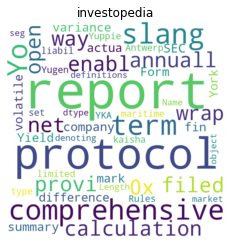

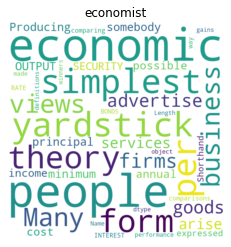

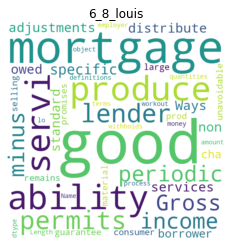

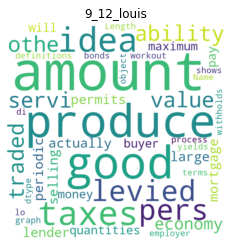

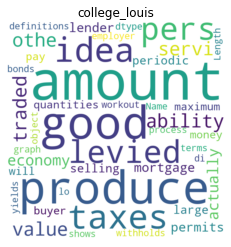

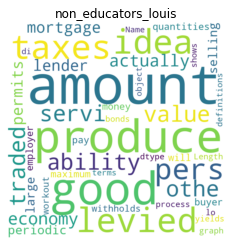

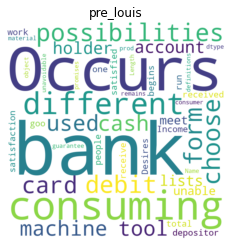

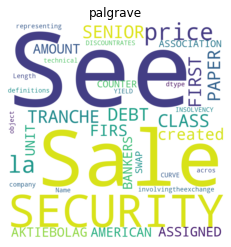

In [ ]:
for source in data['source'].unique():
  data_source = data[data['source']==source]
  text = data_source['definitions']
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=2000,
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(source)
  plt.axis("off")
  plt.show()

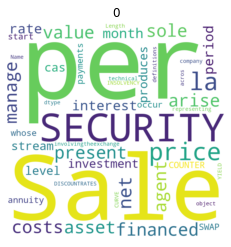

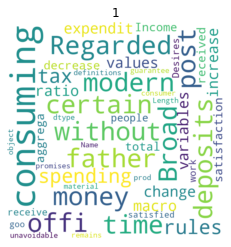

In [ ]:
for read in data['assigned_readibility'].unique():
  data_read = data[data['assigned_readibility']==read]
  text = data_read['definitions']
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=2000,
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(read)
  plt.axis("off")
  plt.show()

# Numeric columns distribution

In [ ]:
numeric_columns = [
       'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog',
       'fernandez_huerta', 'szigriszt_pazos', 'gutierrez_polini', 'crawford',
       'gulpease_index', 'osman']


In [ ]:
data[numeric_columns].describe()

,flesch_reading_ease,flesch_kincaid_grade,smog_index,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford,gulpease_index,osman
count,16168.000000,16168.000000,16168.000000,16168.000000,16168.000000,16168.000000,16168.000000,16168.000000,16168.000000,16168.000000,16168.000000,16168.000000,16168.000000,16168.000000,16168.000000
mean,43.687013,11.939553,3.897897,11.899306,13.273126,10.526475,10.780554,12.701600,14.107055,85.379150,81.939784,38.311718,3.312321,58.980462,48.347918
std,23.867543,4.474074,6.352605,4.251817,5.307850,2.184142,7.312233,6.585383,5.135150,17.783813,18.174019,7.498505,1.831851,22.884581,21.650362
min,-301.790000,-3.500000,0.000000,-33.810000,-6.900000,0.100000,0.000000,-0.500000,0.400000,-154.300000,-167.970000,-50.660000,-19.100000,13.000000,-138.770000
25%,31.890000,9.200000,0.000000,9.630000,10.000000,9.300000,5.000000,8.000000,11.400000,76.100000,72.407500,34.397500,2.800000,48.274704,36.030000
50%,44.580000,11.900000,0.000000,11.880000,13.100000,10.400000,10.000000,12.750000,14.000000,85.700000,82.430000,38.680000,3.600000,53.406780,48.440000
75%,57.610000,14.400000,11.200000,14.200000,16.200000,11.630000,15.000000,16.500000,16.930000,95.600000,92.390000,42.672500,4.300000,60.818182,60.385000
max,121.220000,55.600000,26.500000,51.360000,65.000000,35.270000,131.000000,73.000000,56.000000,145.800000,143.540000,75.450000,14.100000,359.000000,175.600000


In [ ]:
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

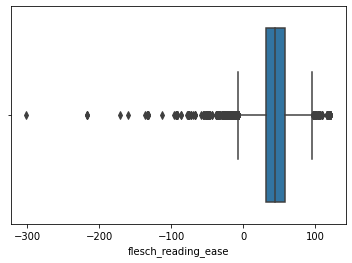

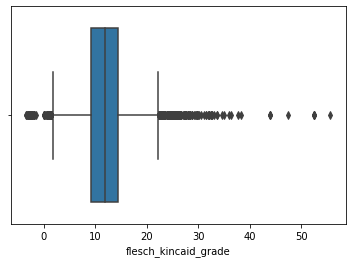

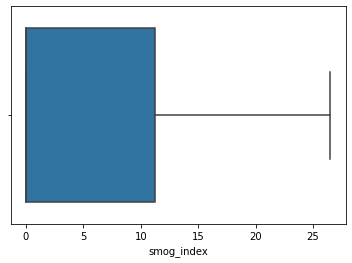

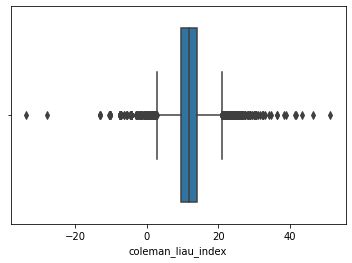

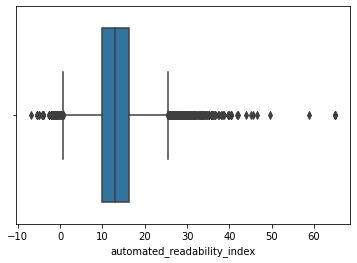

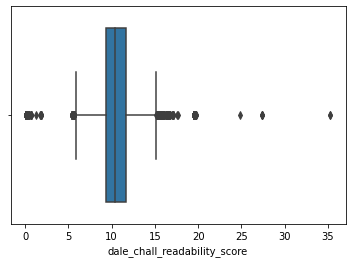

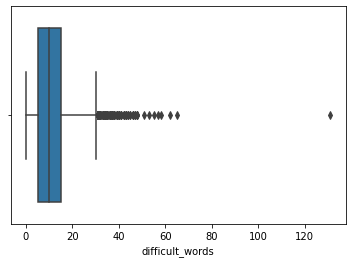

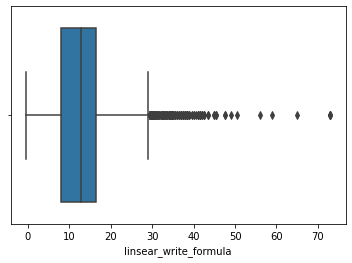

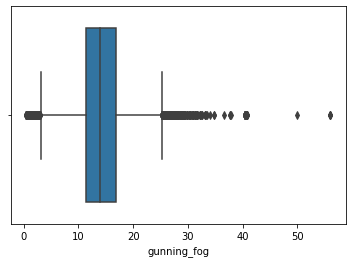

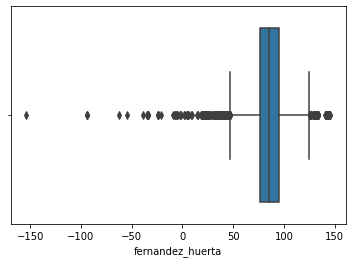

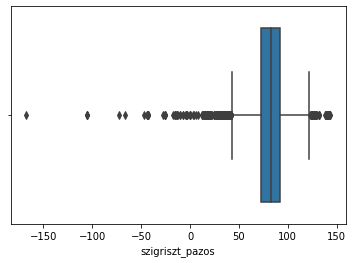

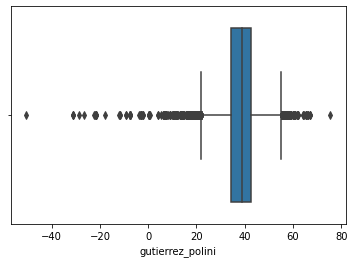

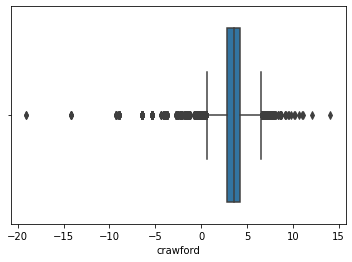

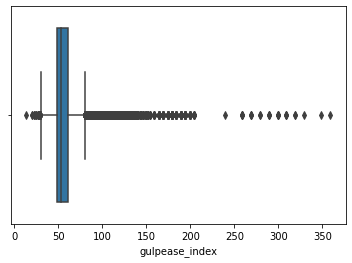

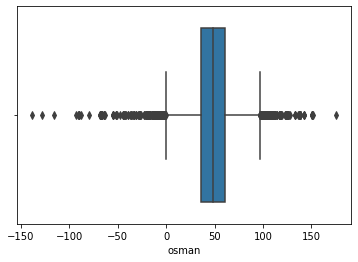

In [ ]:
for col in numeric_columns:
  sns.boxplot(data=data, x = col)
  plt.show()
